# Data Analysis and Preparation for a Customer Churn Dataset
<h3><span style="color: #117d30;"> Exploratory Data Analysis and Feature Engineering in Azure ML</span></h3>


## Disclaimer

By accessing this code, you acknowledge the code is made available for presentation and demonstration purposes only and that the code (1) is not subject to SOC 1 and SOC 2 compliance audits, and (2) is not designed or intended to be a substitute for the professional advice, diagnosis, treatment, or judgment of a certified financial services professional. Do not use this code to replace, substitute, or provide professional financial advice, or judgement. You are solely responsible for ensuring the regulatory, legal, and/or contractual compliance of any use of the code, including obtaining any authorizations or consents, and any solution you choose to build that incorporates this code in whole or in part.

© 2021 Microsoft Corporation. All rights reserved

### Introduction
In this example we show how to do Exploratory Data Analysis, Data Preparation and Feature Engineering for a dataset describing customer churn for a retail bank. At the end of this notebook we will register this dataset in Azure ML and use it in the next few notebooks to run predictive models using Azure's AutoML.

In [41]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# Loading the dataset into a dataframe using pandas
data = pd.read_csv('retail_banking_customer_churn_data.csv')
show = data.head(5)
show.style

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


### Exploratory data analysis
This is the initial step in data analysis. We are going to explore the data set find missing values and data types of the variables to uncover initial patterns, characteristics, and points of interest.

In [43]:
# Renaming the Churn column
data = data.rename (columns={'y': 'churn'})

In [44]:
# Looking at data types of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
churn             41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [45]:
# Summary statistics
perc =[.20] 
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Data visualization

Building visualizations to get insight into our data. This will help us determine the best way to build a model.

Text(0, 0.5, 'Count')

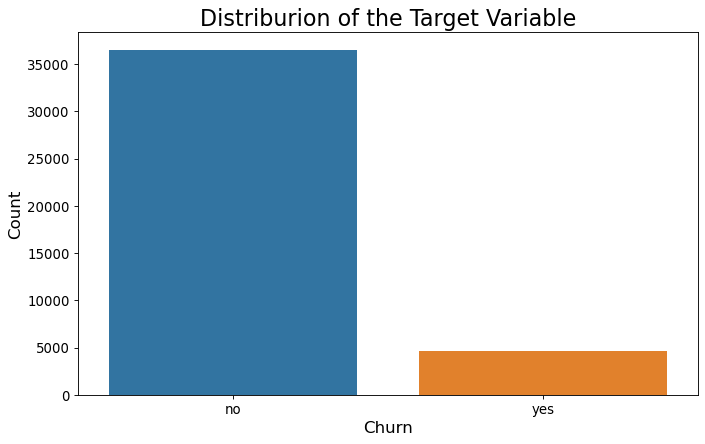

In [46]:
# Visualizing balance between churn and non-churn data points
fig = plt.figure(figsize=(10,6), dpi=80)
ax = sns.countplot(x="churn", data=data)
ax.set_title('Distriburion of the Target Variable', fontsize=20)
ax.set_xlabel('Churn', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)

In [47]:
# Convert binary variable into numeric to make visualisation easier
data['churn'] = data['churn'].map({'yes': 1, 'no': 0})

In [48]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,churn
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/anaconda/envs/azureml_py3

Text(0.5, 1.0, 'Churn count by Poutcome')

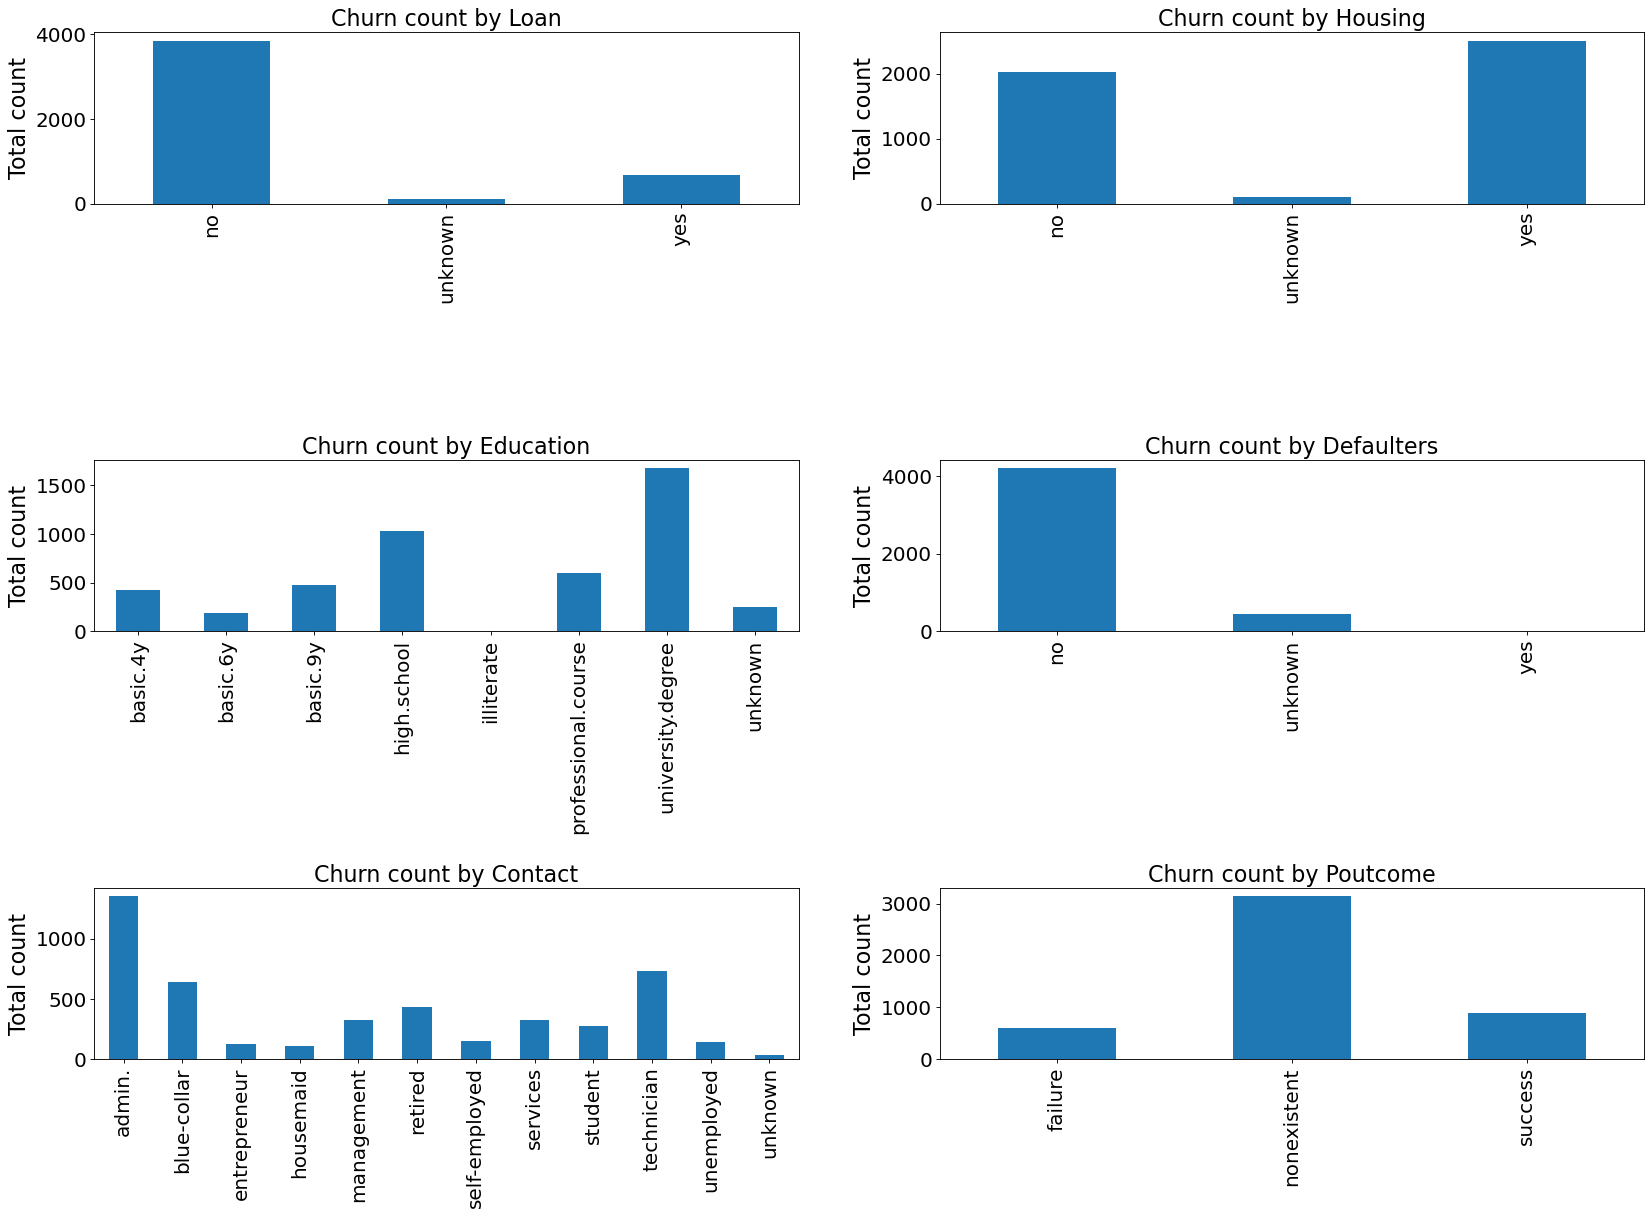

In [49]:
# Visualising distribution of Churn vs non-churn customers based on different categorical divisions
fig, ((ax1,ax2),(ax3,ax4), (ax5,ax6)) = plt.subplots(ncols=2, nrows=3, figsize=(25,17), dpi = 80)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None ,wspace=None, hspace=1.5)
plt.rc('xtick', labelsize = 12)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 12)  

data.groupby('loan').churn.sum().plot(kind='bar', ax = ax1)
ax1.set_ylabel('Total count',fontsize = 20)
ax1.set_xlabel('',fontsize = 20)
ax1.tick_params(labelsize = 18)
ax1.set_title('Churn count by Loan',fontsize = 20)

data.groupby('housing').churn.sum().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Total count',fontsize = 20)
ax2.set_xlabel('',fontsize = 20)
ax2.tick_params(labelsize = 18)
ax2.set_title('Churn count by Housing',fontsize = 20)

data.groupby('education').churn.sum().plot(kind='bar', ax=ax3)
ax3.set_ylabel('Total count',fontsize = 20)
ax3.set_xlabel('',fontsize = 20)
ax3.tick_params(labelsize = 18)
ax3.set_title('Churn count by Education',fontsize = 20)

data.groupby('default').churn.sum().plot(kind='bar', ax=ax4)
ax4.set_ylabel('Total count',fontsize = 20)
ax4.set_xlabel('',fontsize = 20)
ax4.tick_params(labelsize = 18)
ax4.set_title('Churn count by Defaulters',fontsize = 20)

data.groupby('job').churn.sum().plot(kind='bar',ax=ax5)
ax5.set_ylabel('Total count',fontsize = 20)
ax5.set_xlabel('',fontsize = 20)
ax5.tick_params(labelsize = 18)
ax5.set_title('Churn count by Contact',fontsize = 20)

data.groupby('poutcome').churn.sum().plot(kind='bar',ax=ax6)
ax6.set_ylabel('Total count',fontsize = 20)
ax6.set_xlabel('',fontsize = 20)
ax6.tick_params(labelsize = 18)
ax6.set_title('Churn count by Poutcome',fontsize = 20)

Convert "unknown" values to NA to make them easier to clean

In [50]:
# Converting to nan since we need to find the mean and that cannot be computed with an empty string. It can be computed using Nan 
data.replace("unknown", np.nan, inplace=True) 

# Now we know that total charges has nan values
data.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
churn                0
dtype: int64

Text(9.11656539351852, 0.5, 'emp.var.rate')

<Figure size 800x640 with 0 Axes>

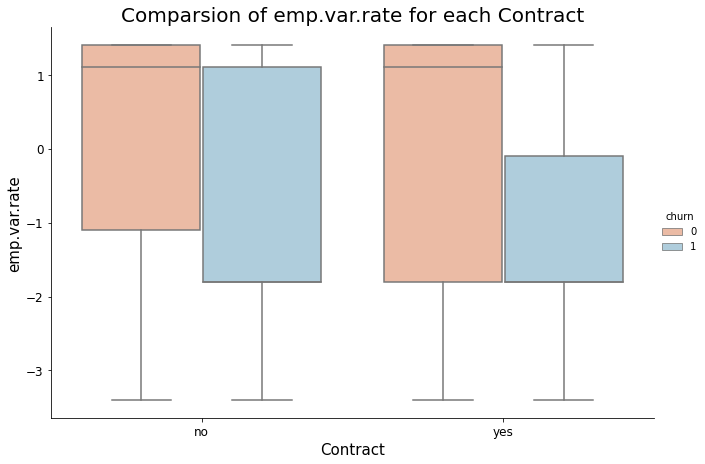

In [51]:
plt.figure(figsize=(10,8), dpi=80)
ax = sns.catplot(x="housing", y="emp.var.rate", hue="churn", kind="box", data=data, height = 6,aspect = 1.5,palette = 'RdBu')
plt.title('Comparsion of emp.var.rate for each Contract',fontsize = 20)
plt.xlabel('Contract',fontsize = 15)
plt.ylabel('emp.var.rate',fontsize = 15)

Text(0, 0.5, 'Kernel Density Estimate')

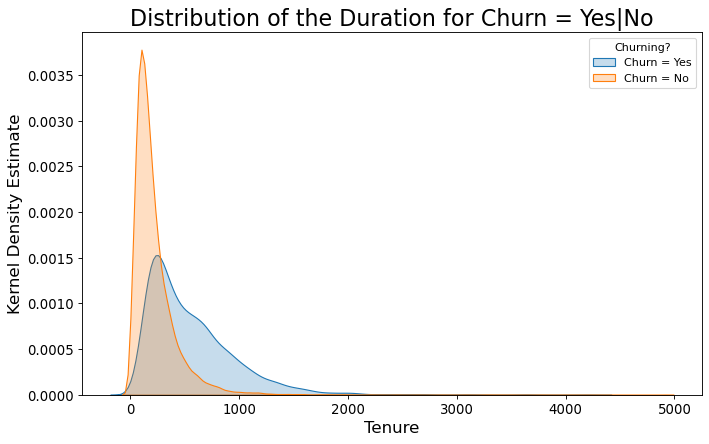

In [52]:
# Grouping Tenure data by whether customers churn or not
kde_plot_data_a = data[data['churn'] == 1]['duration']
kde_plot_data_b = data[data['churn'] == 0]['duration']

plt.figure(figsize=(10,6), dpi=80)
sns.kdeplot(data = kde_plot_data_a,shade = True, legend = False)
sns.kdeplot(data = kde_plot_data_b, shade = True, legend = False)
plt.legend(title='Churning?', loc='upper right', labels=['Churn = Yes', 'Churn = No'])
plt.title('Distribution of the Duration for Churn = Yes|No',fontsize=20)
plt.xlabel('Tenure',fontsize = 15)
plt.ylabel('Kernel Density Estimate',fontsize = 15)

Visualising consumer price index for Churning vs non-churn customers

Text(0, 0.5, 'Kernel Density Estimate')

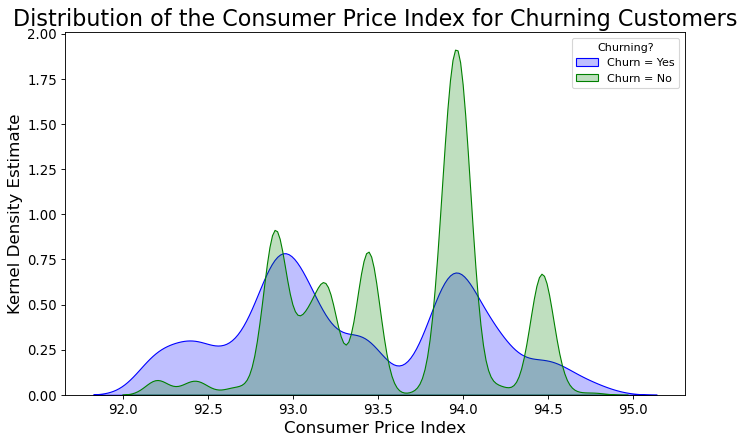

In [53]:
kde_plot_data_a = data[data['churn'] == 1]['cons.price.idx']
kde_plot_data_b = data[data['churn'] == 0]['cons.price.idx']

plt.figure(figsize=(10,6), dpi=80)
sns.kdeplot(data = kde_plot_data_a,shade = True, color = 'blue', legend = False)
sns.kdeplot(data = kde_plot_data_b, shade = True, color = 'green', legend = False )
plt.title('Distribution of the Consumer Price Index for Churning Customers',fontsize=20)
plt.legend(title='Churning?', loc='upper right', labels=['Churn = Yes', 'Churn = No'])
plt.xlabel('Consumer Price Index',fontsize = 15)
plt.ylabel('Kernel Density Estimate',fontsize = 15)

Visualising employment variation rate for Churning vs non-churn customers

Text(0, 0.5, 'Kernel Density Estimate')

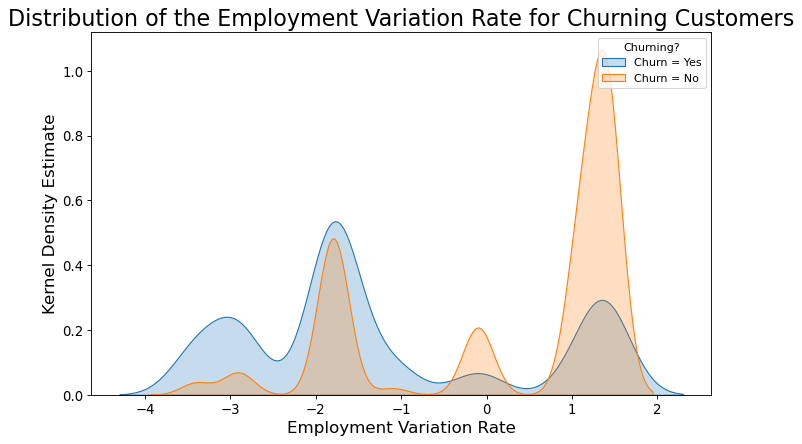

In [54]:
kde_plot_data_a = data[data['churn'] == 1]['emp.var.rate']
kde_plot_data_b = data[data['churn'] == 0]['emp.var.rate']

plt.figure(figsize=(10,6), dpi=80)
sns.kdeplot(data = kde_plot_data_a,shade = True, legend = False)
sns.kdeplot(data = kde_plot_data_b, shade = True, legend = False )
plt.title('Distribution of the Employment Variation Rate for Churning Customers',fontsize=20)
plt.legend(title='Churning?', loc='upper right', labels=['Churn = Yes', 'Churn = No'])
plt.xlabel('Employment Variation Rate',fontsize = 15)
plt.ylabel('Kernel Density Estimate',fontsize = 15)

Visualising Euribor for Churning vs non-churn customers

Text(0, 0.5, 'Kernel Density Estimate')

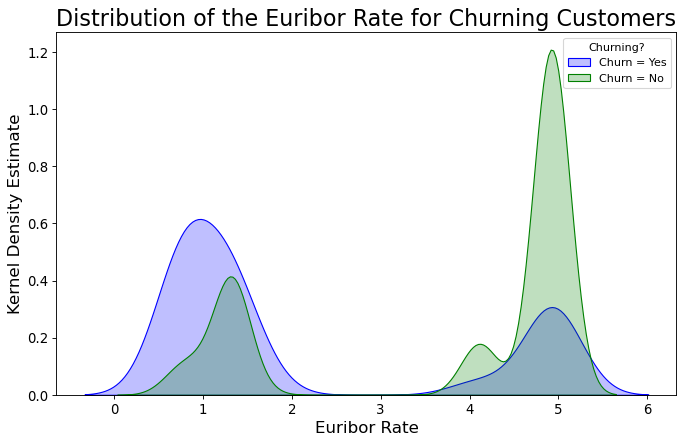

In [55]:
kde_plot_data_a = data[data['churn'] == 1]['euribor3m']
kde_plot_data_b = data[data['churn'] == 0]['euribor3m']

plt.figure(figsize=(10,6), dpi=80)
sns.kdeplot(data = kde_plot_data_a,shade = True, color = 'blue', legend = False)
sns.kdeplot(data = kde_plot_data_b, shade = True, color = 'green', legend = False )
plt.title('Distribution of the Euribor Rate for Churning Customers',fontsize=20)
plt.legend(title='Churning?', loc='upper right', labels=['Churn = Yes', 'Churn = No'])
plt.xlabel('Euribor Rate',fontsize = 15)
plt.ylabel('Kernel Density Estimate',fontsize = 15)

### Feature engineering/ pre-processing pipeline

Now that we have insight into the data, we are going to start building a pipeline for the data. 

In [56]:
# Defining a function to encode categorical variables
from sklearn.preprocessing import LabelEncoder

def labelencoder(column):
    transform = LabelEncoder()
    data[column] = transform.fit_transform(data[column]) 

In [57]:
# Applying encoding function to select categorical features
names = ['marital', 'housing', 'loan', 'contact']
for column in names:
    data[column] = data[column].astype(str)
    labelencoder(column)

In [58]:
# Converting selected columns to dummy variables
names = ['education', 'poutcome', 'job']
data = pd.get_dummies(data=data, columns=names)

In [59]:
show = data.tail(5)
show.style

,age,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,churn,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,poutcome_failure,poutcome_nonexistent,poutcome_success,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
41183,73,1,no,2,1,0,nov,fri,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
41184,46,1,no,1,1,0,nov,fri,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
41185,56,1,no,2,1,0,nov,fri,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
41186,44,1,no,1,1,0,nov,fri,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
41187,74,1,no,2,1,0,nov,fri,239,3,999,1,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [60]:
# Dropping columns that don't seem relevant
data = data.drop(['default', 'day_of_week', 'duration', 'month', 'campaign', 'education_illiterate', 'job_housemaid'], axis=1)

In [61]:
show = data.tail(5)
show.style

,age,marital,housing,loan,contact,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,churn,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,poutcome_failure,poutcome_nonexistent,poutcome_success,job_admin.,job_blue-collar,job_entrepreneur,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
41183,73,1,2,1,0,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
41184,46,1,1,1,0,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
41185,56,1,2,1,0,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
41186,44,1,1,1,0,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
41187,74,1,2,1,0,999,1,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [62]:
# Saving feature engineered dataset for use in model building
data.to_csv('prepared_customer_churn_data.csv', index =  False)